# create model / train test validate split / Evaluations ( (Validation Set)

train layer0 in 0.01 sec
train layer1 in 0.05 sec
train layer2 in 0.05 sec
train layer3 in 0.04 sec


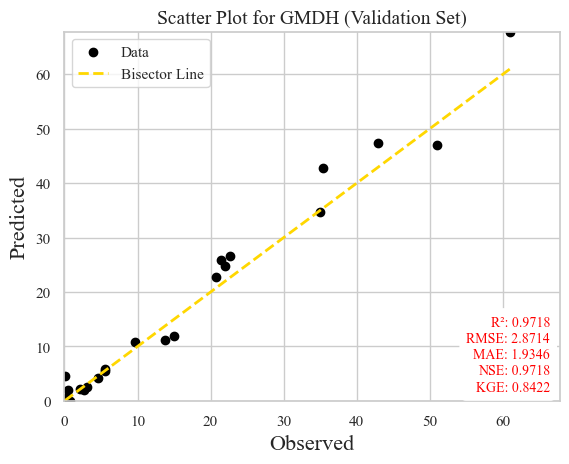

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gmdhpy import gmdh
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the features (important for GMDH)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a GMDH model
model = gmdh.MultilayerGMDH()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum(np.square(y_test - y_pred)) / np.sum(np.square(y_test - np.mean(y_test))))

# Calculate Kling-Gupta Efficiency (KGE)
mean_observed = np.mean(y_test)
kge = 1 - np.sqrt((np.var(y_test - y_pred) / np.var(y_test - mean_observed)) +
                  (np.square(np.corrcoef(y_test, y_pred)[0, 1] - 1)))

# Display evaluation metrics with transparent or hollow color
text_message = f'R²: {r_squared:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nNSE: {nse:.4f}\nKGE: {kge:.4f}'
plt.text(0.98, 0.02, text_message, transform=plt.gca().transAxes, fontsize=10, color='red', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'), ha='right', va='bottom')

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, color='black', label='Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gold', linewidth=2, label='Bisector Line')
plt.title('Scatter Plot for GMDH (Validation Set)', fontsize=14)
plt.xlabel('Observed', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.legend(loc='upper left')  # Move legend to upper left

# Set the same limits for both axes
min_limit = min(min(y_test), min(y_pred))
max_limit = max(max(y_test), max(y_pred))
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.grid(True)
plt.show()


# entire set

train layer0 in 0.01 sec
train layer1 in 0.05 sec
train layer2 in 0.05 sec
train layer3 in 0.05 sec
train layer4 in 0.06 sec
train layer5 in 0.05 sec


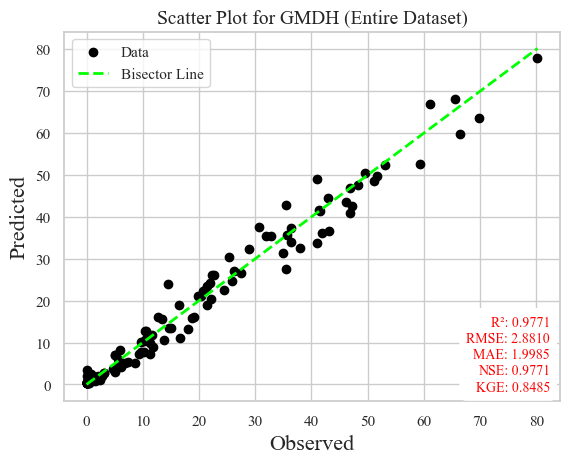

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from gmdhpy import gmdh
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Standardize the features (important for GMDH)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Create a GMDH model
model = gmdh.MultilayerGMDH()

# Train the model on the entire dataset
model.fit(X_scaled, y)

# Make predictions on the entire dataset
y_pred = model.predict(X_scaled)

# Calculate evaluation metrics
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum(np.square(y - y_pred)) / np.sum(np.square(y - np.mean(y))))

# Calculate Kling-Gupta Efficiency (KGE)
mean_observed = np.mean(y)
kge = 1 - np.sqrt((np.var(y - y_pred) / np.var(y - mean_observed)) +
                  (np.square(np.corrcoef(y, y_pred)[0, 1] - 1)))

# Display evaluation metrics
text_message = f'R²: {r_squared:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nNSE: {nse:.4f}\nKGE: {kge:.4f}'
plt.text(0.98, 0.02, text_message, transform=plt.gca().transAxes, fontsize=10, color='red', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'), ha='right', va='bottom')

# Plot actual vs. predicted values for the entire dataset
plt.scatter(y, y_pred, color='black', label='Data')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='lime', linewidth=2, label='Bisector Line')
plt.title('Scatter Plot for GMDH (Entire Dataset)', fontsize=14)
plt.xlabel('Observed', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.legend(loc='upper left')  # Move legend to upper left

plt.grid(True)
plt.show()


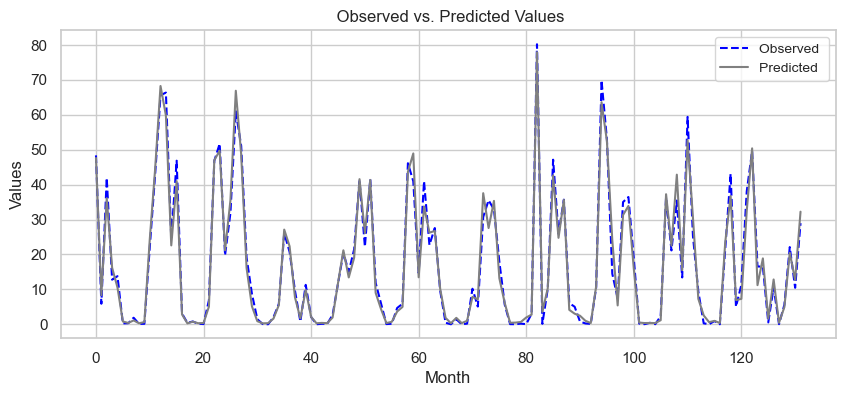

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style (optional, but can enhance the appearance)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))
sns.lineplot(data=y, label='Observed ', linestyle='--', color='blue')  # Use dash line for actual values with blue color
sns.lineplot(data=y_pred, label='Predicted ', color='gray')  # Use solid line for predicted values with orange color
plt.title(' Observed vs. Predicted Values', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(loc='upper right', fontsize='small')
plt.show()


train layer0 in 0.01 sec
train layer1 in 0.05 sec
train layer2 in 0.05 sec
train layer3 in 0.04 sec


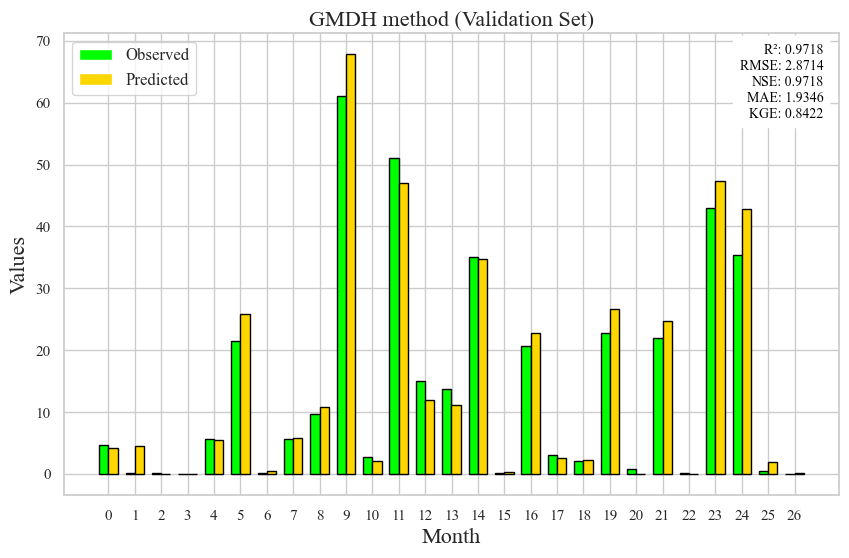

Test Set Performance:
R²: 0.9718
RMSE: 2.8714
MAE: 1.9346
NSE: 0.9718
KGE: 0.8422


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gmdhpy import gmdh
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the features (important for GMDH)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a GMDH model
model = gmdh.MultilayerGMDH()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
r_squared = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum(np.square(y_test - y_test_pred)) / np.sum(np.square(y_test - np.mean(y_test))))

# Calculate Kling-Gupta Efficiency (KGE)
mean_observed = np.mean(y_test)
kge = 1 - np.sqrt((np.var(y_test - y_test_pred) / np.var(y_test - mean_observed)) +
                  (np.square(np.corrcoef(y_test, y_test_pred)[0, 1] - 1)))

# Bar plot of actual vs. predicted values on the validation set
y_val = y_test
y_val_pred = y_test_pred
width = 0.35
ind = np.arange(len(y_val))
plt.figure(figsize=(10, 6))
bars1 = plt.bar(ind, y_val, width, label='Observed', color='lime')
bars2 = plt.bar(ind + width, y_val_pred, width, label='Predicted', color='gold')

# Display mean bias assessment metrics for the validation set in top right
text_message = f'R²: {r2_score(y_val, y_val_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}\nNSE: {1 - (mean_squared_error(y_val, y_val_pred) / np.var(y_val)):.4f}\nMAE: {mean_absolute_error(y_val, y_val_pred):.4f}\nKGE: {kge:.4f}'
plt.text(0.98, 0.98, text_message, transform=plt.gca().transAxes, fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'), ha='right', va='top')

plt.title('GMDH method (Validation Set)', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.legend(loc='upper left', fontsize='medium')

# Move the legend to the upper left
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='medium')

# Remove the bisector line
for bar in bars1:
    bar.set_edgecolor('black')

for bar in bars2:
    bar.set_edgecolor('black')

plt.xticks(ind + width / 2, ind)
plt.grid(True)
plt.show()

# Evaluate performance on the test set
print("Test Set Performance:")
print(f'R²: {r_squared:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nNSE: {nse:.4f}\nKGE: {kge:.4f}')
